In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
#import libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
import keras
from keras.applications import VGG19,Xception,VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras import layers
import tensorflow as tf

In [3]:
#import  train test data 
## loading training set
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)

train_data = train_datagen.flow_from_directory(
    'input/data/train',   target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)


## loading validation dataset
test_datagen =  ImageDataGenerator(rescale=1/255)
test_data =   test_datagen.flow_from_directory(
    'input/data/test',   target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [4]:
#display classes names
class_names = ["Benign","Malignant"]
for i in class_names :
    print(class_names.index(i),"  ",i)

0    Benign
1    Malignant


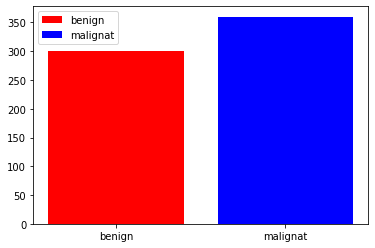

In [5]:
#visulaize test_data
fig, ax = plt.subplots()
ax.bar(["benign"],[300],color= "r",label='benign')
ax.bar(["malignat"],[360],color ="b",label ="malignat")
ax.legend()

benign


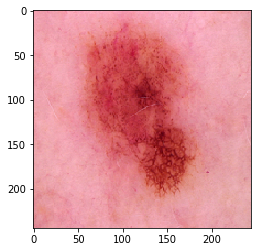

In [6]:
from keras.preprocessing import image
import numpy as np
image_path = "input/data/test/benign/1261.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("benign")
plt.imshow(new_img)

malignant


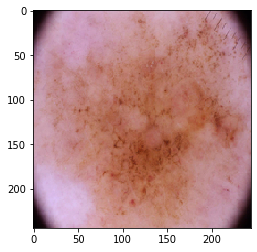

In [7]:
from keras.preprocessing import image
import numpy as np
image_path = "input/data/test/malignant/1080.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("malignant")
plt.imshow(new_img)

In [3]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(2, activation= 'softmax')
])

NameError: name 'layers' is not defined

In [2]:
import tensorflow as tf
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#early stopping function
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

NameError: name 'model' is not defined

In [10]:
#fit the model
histroy=model.fit(train_data,
    validation_data = test_data, 
    callbacks=[early],
    epochs = 50)

Epoch 1/50
83/83 [==============================] - 116s 1s/step - loss: 0.6600 - accuracy: 0.6038 - val_loss: 0.6463 - val_accuracy: 0.7682
Epoch 2/50
83/83 [==============================] - 24s 286ms/step - loss: 0.4671 - accuracy: 0.7849 - val_loss: 0.5643 - val_accuracy: 0.8091
Epoch 3/50
83/83 [==============================] - 23s 274ms/step - loss: 0.4535 - accuracy: 0.7772 - val_loss: 0.4590 - val_accuracy: 0.7955
Epoch 4/50
83/83 [==============================] - 23s 274ms/step - loss: 0.4511 - accuracy: 0.7631 - val_loss: 0.5271 - val_accuracy: 0.7591
Epoch 5/50
83/83 [==============================] - 23s 274ms/step - loss: 0.4308 - accuracy: 0.7981 - val_loss: 0.4668 - val_accuracy: 0.7758
Epoch 6/50
83/83 [==============================] - 23s 271ms/step - loss: 0.4217 - accuracy: 0.7910 - val_loss: 0.4267 - val_accuracy: 0.7955
Epoch 7/50
83/83 [==============================] - 28s 333ms/step - loss: 0.4296 - accuracy: 0.7858 - val_loss: 0.3953 - val_accuracy: 0.7788
E

In [1]:
#evulate model
model.evaluate(test_data)

NameError: name 'model' is not defined

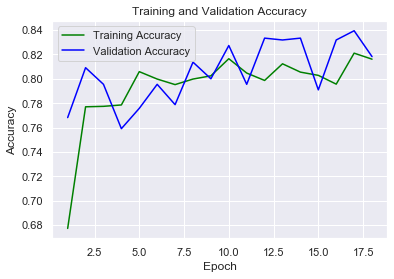

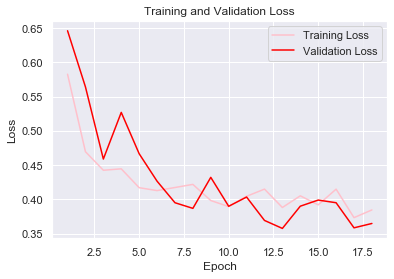

In [12]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']
loss = histroy.history['loss']
val_loss = histroy.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
#predict val data
y_pred = model.predict(test_data)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)

[0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0
 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1
 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1
 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0
 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1
 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1
 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0
 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1
 0 0 1 1 0 0 0 0 1 1 1 0 

[0]
Benign


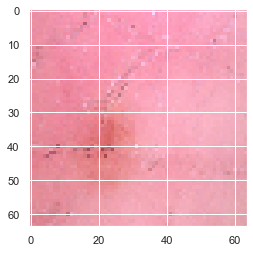

In [14]:
#example 1
from keras.preprocessing import image
import numpy as np
image_path = "input/data/test/benign/1006.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[1]
Malignant


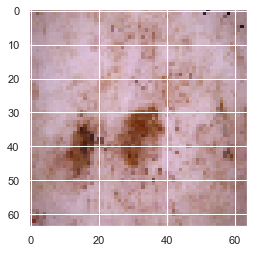

In [15]:
#example 2
from keras.preprocessing import image
import numpy as np
image_path = "input/data/train/malignant/1006.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[0]
Benign


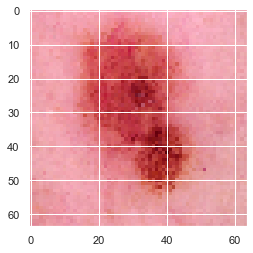

In [16]:
#example 3
from keras.preprocessing import image
import numpy as np
image_path = "input/data/test/benign/1261.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[1]
Malignant


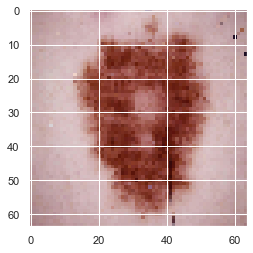

In [17]:
#example 3=4
from keras.preprocessing import image
import numpy as np
image_path = "input/data/test/malignant/1058.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [18]:
#save file as h5 model
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save("model_skin.h5") 

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [22]:
model.save("skin_cancer")


INFO:tensorflow:Assets written to: skin_cancer\assets


In [24]:
reconstructed_model = keras.models.load_model("skin_cancer")

[1]
Malignant


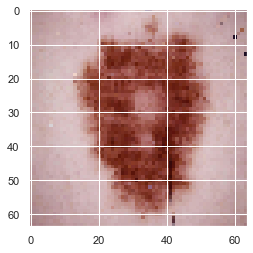

In [26]:
result = reconstructed_model.predict(img)
prediction = np.argmax(result,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)
